# SLC FINAL EXAM

### DATA DESCRIPTION: 


 
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145157, 1990.). The model evaluates cars according to the following concept structure: 
 
CAR car acceptability 

. PRICE overall price 

. . buying buying price 

. . maint price of the maintenance 

. TECH technical characteristics 

. . COMFORT comfort 

. . . doors number of doors 

. . . persons capacity in terms of persons to carry 

. . . lug_boot the size of luggage boot 

. . safety estimated safety of the car 
 
Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples 

ATTRIBUTE INFORMATION: 

Class Values: unacc, acc, good, vgood 
 
Attributes: 
 
buying: vhigh, high, med, low. 

maint: vhigh, high, med, low. 

doors: 2, 3, 4, 5more. 

persons: 2, 4, more. 

lug_boot: small, med, big. 

safety: low, med, high. 

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [200]:
import csv

with open("data_set.csv","r")as file:
    reader=csv.reader(file)
df=pd.read_csv("data_set.csv")

<IPython.core.display.Javascript object>

In [201]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [202]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [84]:
df.isnull().sum()*100/df.shape[0]

vhigh      0.0
vhigh.1    0.0
2          0.0
2.1        0.0
small      0.0
low        0.0
unacc      0.0
dtype: float64

In [85]:
df["small"].value_counts()

med      576
big      576
small    575
Name: small, dtype: int64

In [86]:
df["vhigh.1"].value_counts()

high     432
low      432
med      432
vhigh    431
Name: vhigh.1, dtype: int64

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()


In [203]:
# renaming the columns

df=df.rename(columns={"vhigh":"buying","vhigh.1":"maint", '2':"doors", 
                      '2.1':"persons", 'small':"lug_boot", 'low':"safety", 'unacc':"Class Values"})

In [204]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [205]:
# a. Find out number of rows; no. & types of variables (continuous, categorical etc.)

# a. Find out number of rows
df.shape[1]


7

In [206]:
# no. & types of variables (continuous, categorical etc.)

categorical=df.select_dtypes(include="object").columns.to_list()

print(categorical)
print(len(categorical))

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class Values']
7


In [207]:
numerical=df.select_dtypes(include="number").columns.to_list()

print(numerical)
print(len(numerical))

[]
0


In [208]:
df["persons"].value_counts()

more    576
4       576
2       575
Name: persons, dtype: int64

In [93]:
df["doors"].value_counts()

5more    432
3        432
4        432
2        431
Name: doors, dtype: int64

In [209]:
# 5 or more is changed to 5

df.loc[df["doors"]=="5more","doors"]=5

In [210]:
# 5 or more is changed to 5

df.loc[df["persons"]=="more","persons"]=5

In [211]:
df["persons"]=df["persons"].astype(int)

In [212]:
df["doors"]=df["doors"].astype(int)

In [213]:
categorical=df.select_dtypes(include="object").columns.to_list()

print(categorical)
print(len(categorical))

['buying', 'maint', 'lug_boot', 'safety', 'Class Values']
5


In [214]:
# b. Calculate five-point summary for numerical variables


# doing ordinal encoding since there is an order present
from sklearn.preprocessing import OrdinalEncoder

df[categorical].head()

,buying,maint,lug_boot,safety,Class Values
0,vhigh,vhigh,small,med,unacc
1,vhigh,vhigh,small,high,unacc
2,vhigh,vhigh,med,low,unacc
3,vhigh,vhigh,med,med,unacc
4,vhigh,vhigh,med,high,unacc


In [215]:
df["buying"].value_counts().index

Index(['high', 'low', 'med', 'vhigh'], dtype='object')

In [216]:
df["maint"].value_counts().index

Index(['high', 'low', 'med', 'vhigh'], dtype='object')

In [103]:
df["lug_boot"].value_counts().index

Index(['med', 'big', 'small'], dtype='object')

In [104]:
df["safety"].value_counts().index

Index(['high', 'med', 'low'], dtype='object')

In [105]:
df["Class Values"].value_counts().index

Index(['unacc', 'acc', 'good', 'vgood'], dtype='object')

In [217]:
ordinal_encoder=OrdinalEncoder(categories=[['low', 'med','high', 'vhigh']])
df["buying"]=ordinal_encoder.fit_transform(df[["buying"]])
df["maint"]=ordinal_encoder.fit_transform(df[["maint"]])

In [218]:
ordinal_encoder=OrdinalEncoder(categories=[['small','med', 'big']])
df["lug_boot"]=ordinal_encoder.fit_transform(df[["lug_boot"]])

In [219]:
ordinal_encoder=OrdinalEncoder(categories=[['low','med','high']])
df["safety"]=ordinal_encoder.fit_transform(df[["safety"]])

In [220]:
ordinal_encoder=OrdinalEncoder(categories=[['unacc', 'acc', 'good', 'vgood']])
df["Class Values"]=ordinal_encoder.fit_transform(df[["Class Values"]])

In [221]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,3.0,3.0,2,2,0.0,1.0,0.0
1,3.0,3.0,2,2,0.0,2.0,0.0
2,3.0,3.0,2,2,1.0,0.0,0.0
3,3.0,3.0,2,2,1.0,1.0,0.0
4,3.0,3.0,2,2,1.0,2.0,0.0


In [222]:
# b. Calculate five-point summary for numerical variables

df.describe()

,buying,maint,doors,persons,lug_boot,safety,Class Values
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,1.499131,1.499131,3.500869,3.667632,1.000579,1.000579,0.415171
std,1.118098,1.118098,1.118098,1.247296,0.816615,0.816615,0.740847
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,0.500000,0.500000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,4.500000,5.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,3.000000


In [223]:
#c. Summarize observations for categorical variables – no. of categories, % observations in each category

100-df.isnull().sum()*100/df.shape[0]


# all are categorical columns  2 columns were there which were numerical , 
#but I consider it as categorical as no of observations are very less

buying          100.0
maint           100.0
doors           100.0
persons         100.0
lug_boot        100.0
safety          100.0
Class Values    100.0
dtype: float64

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [ ]:
#a. Do variables have missing/null values?

# no missing or null values, go check first cell

In [224]:
numerical=df.select_dtypes(include="number").columns.to_list()

print(numerical)
print(len(numerical))

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class Values']
7


<IPython.core.display.Javascript object>

0.0    432
2.0    432
1.0    432
3.0    431
Name: buying, dtype: int64

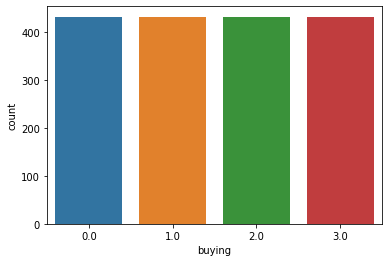

In [225]:
sns.countplot(x=df['buying'])
df['buying'].value_counts()

<IPython.core.display.Javascript object>

3    432
4    432
5    432
2    431
Name: doors, dtype: int64

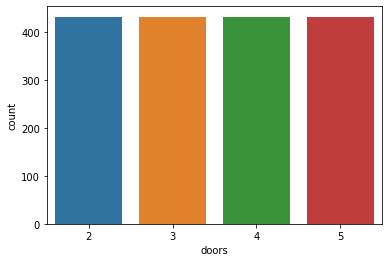

In [226]:
sns.countplot(x=df['doors'])
df['doors'].value_counts()

<IPython.core.display.Javascript object>

0.0    432
2.0    432
1.0    432
3.0    431
Name: maint, dtype: int64

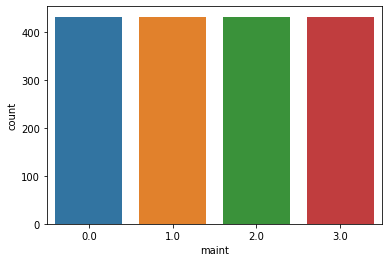

In [124]:
sns.countplot(x=df['maint'])
df['maint'].value_counts()

<IPython.core.display.Javascript object>

4    576
5    576
2    575
Name: persons, dtype: int64

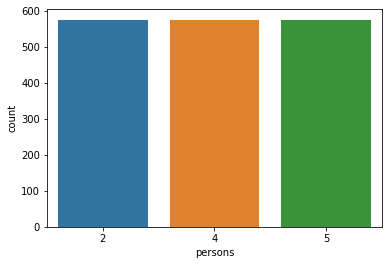

In [125]:
# 'persons',
sns.countplot(x=df['persons'])
df['persons'].value_counts()

<IPython.core.display.Javascript object>

2.0    576
1.0    576
0.0    575
Name: lug_boot, dtype: int64

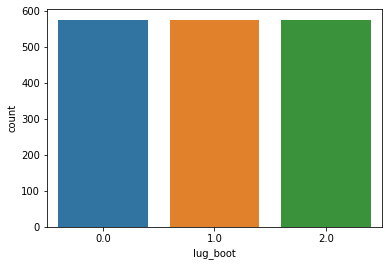

In [126]:
#'lug_boot', 
sns.countplot(x=df['lug_boot'])
df['lug_boot'].value_counts()

<IPython.core.display.Javascript object>

2.0    576
1.0    576
0.0    575
Name: safety, dtype: int64

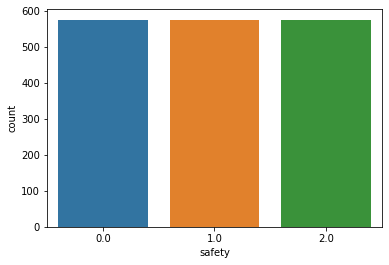

In [127]:
#'safety', 'Class Values'

sns.countplot(x=df['safety'])
df['safety'].value_counts()

In [ ]:
#b. Do variables have outliers?

#THERE is no outliers

<IPython.core.display.Javascript object>

0.0    1209
1.0     384
2.0      69
3.0      65
Name: Class Values, dtype: int64

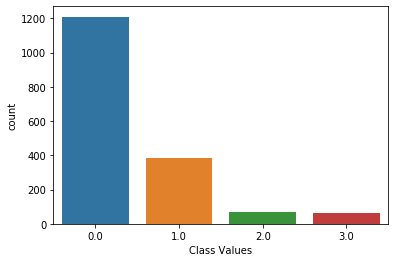

In [227]:
#'Class Values'

sns.countplot(x=df['Class Values'])
df['Class Values'].value_counts()

In [228]:
target_vals=df['Class Values'].value_counts()
target_vals

0.0    1209
1.0     384
2.0      69
3.0      65
Name: Class Values, dtype: int64

In [136]:
target_vals[0.0]

1209

In [229]:
df['Class Values']=df['Class Values'].astype(int)

In [230]:
#c. Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem.

#THere is a class imbalance in target

#If Yes, what steps are being taken to rectify the problem.

#I prefer doing smoting to handle class imbalance


from imblearn.over_sampling import SMOTE

minority_classes=[2,3]
minority_classe_label=minority_classes[0]
minority_classe_label

2

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   buying        1727 non-null   float64
 1   maint         1727 non-null   float64
 2   doors         1727 non-null   int64  
 3   persons       1727 non-null   int64  
 4   lug_boot      1727 non-null   float64
 5   safety        1727 non-null   float64
 6   Class Values  1727 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 94.6 KB


In [232]:
X=df.drop("Class Values",axis=1)
Y=df["Class Values"]

In [233]:
smote=SMOTE(k_neighbors=2)
x,y=smote.fit_resample(X,Y)

In [234]:
y.value_counts()

0    1209
1    1209
2    1209
3    1209
Name: Class Values, dtype: int64

In [235]:
x["Class Values"]=y

<IPython.core.display.Javascript object>

0    1209
1    1209
2    1209
3    1209
Name: Class Values, dtype: int64

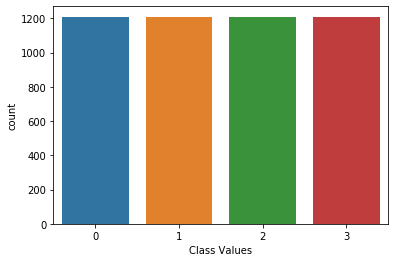

In [236]:
df1=x

#'Class Values'

sns.countplot(x=df1['Class Values'])
df1['Class Values'].value_counts()

### 4.	Summarize relationships among variables (10 marks)               
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

 Hint: based on your observations you may want to transform features or create additional features.


<IPython.core.display.Javascript object>

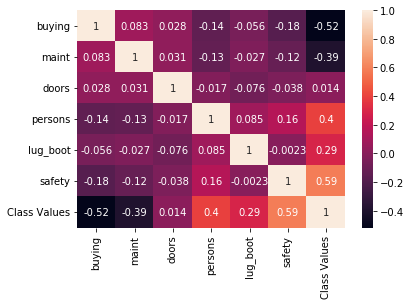

In [237]:
#4 a)


sns.heatmap(df1.corr(), annot=True)

In [238]:
df1.corr()["Class Values"]

buying         -0.519197
maint          -0.389787
doors           0.014415
persons         0.399768
lug_boot        0.292652
safety          0.585167
Class Values    1.000000
Name: Class Values, dtype: float64

In [239]:
#Do you want to exclude some variables from the model based on this analysis? 

# dropping doors which is very close to 0

df1.drop("Class Values",axis=1)

,buying,maint,doors,persons,lug_boot,safety
0,3.000000,3.000000,2,2,0.0,1.0
1,3.000000,3.000000,2,2,0.0,2.0
2,3.000000,3.000000,2,2,1.0,0.0
3,3.000000,3.000000,2,2,1.0,1.0
4,3.000000,3.000000,2,2,1.0,2.0
...,...,...,...,...,...,...
4831,0.838826,1.000000,4,4,2.0,2.0
4832,0.084987,1.000000,4,5,2.0,2.0
4833,0.000000,1.000000,4,4,2.0,2.0
4834,0.000000,1.421582,5,4,1.0,2.0


In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [240]:
# What other actions will you take?
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data=pd.DataFrame()
    vif_data["variable"]=df.columns
    vif_data["VIF"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif_data
    

In [241]:
vif_results= calculate_vif(df1)
vif_results

# vif value of persons is only above 10


<IPython.core.display.Javascript object>

,variable,VIF
0,buying,3.033997
1,maint,2.687561
2,doors,8.078144
3,persons,13.812192
4,lug_boot,3.747878
5,safety,8.637884
6,Class Values,10.045171


<IPython.core.display.Javascript object>

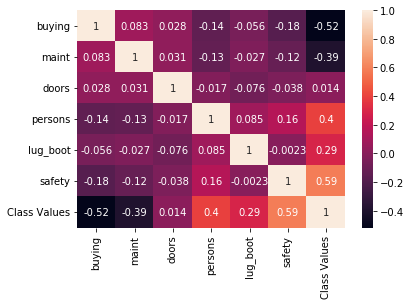

In [242]:
#b. Plot all independent variables with the target & find out the relationship? 
#Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

sns.heatmap(df1.corr(),annot=True)

<IPython.core.display.Javascript object>

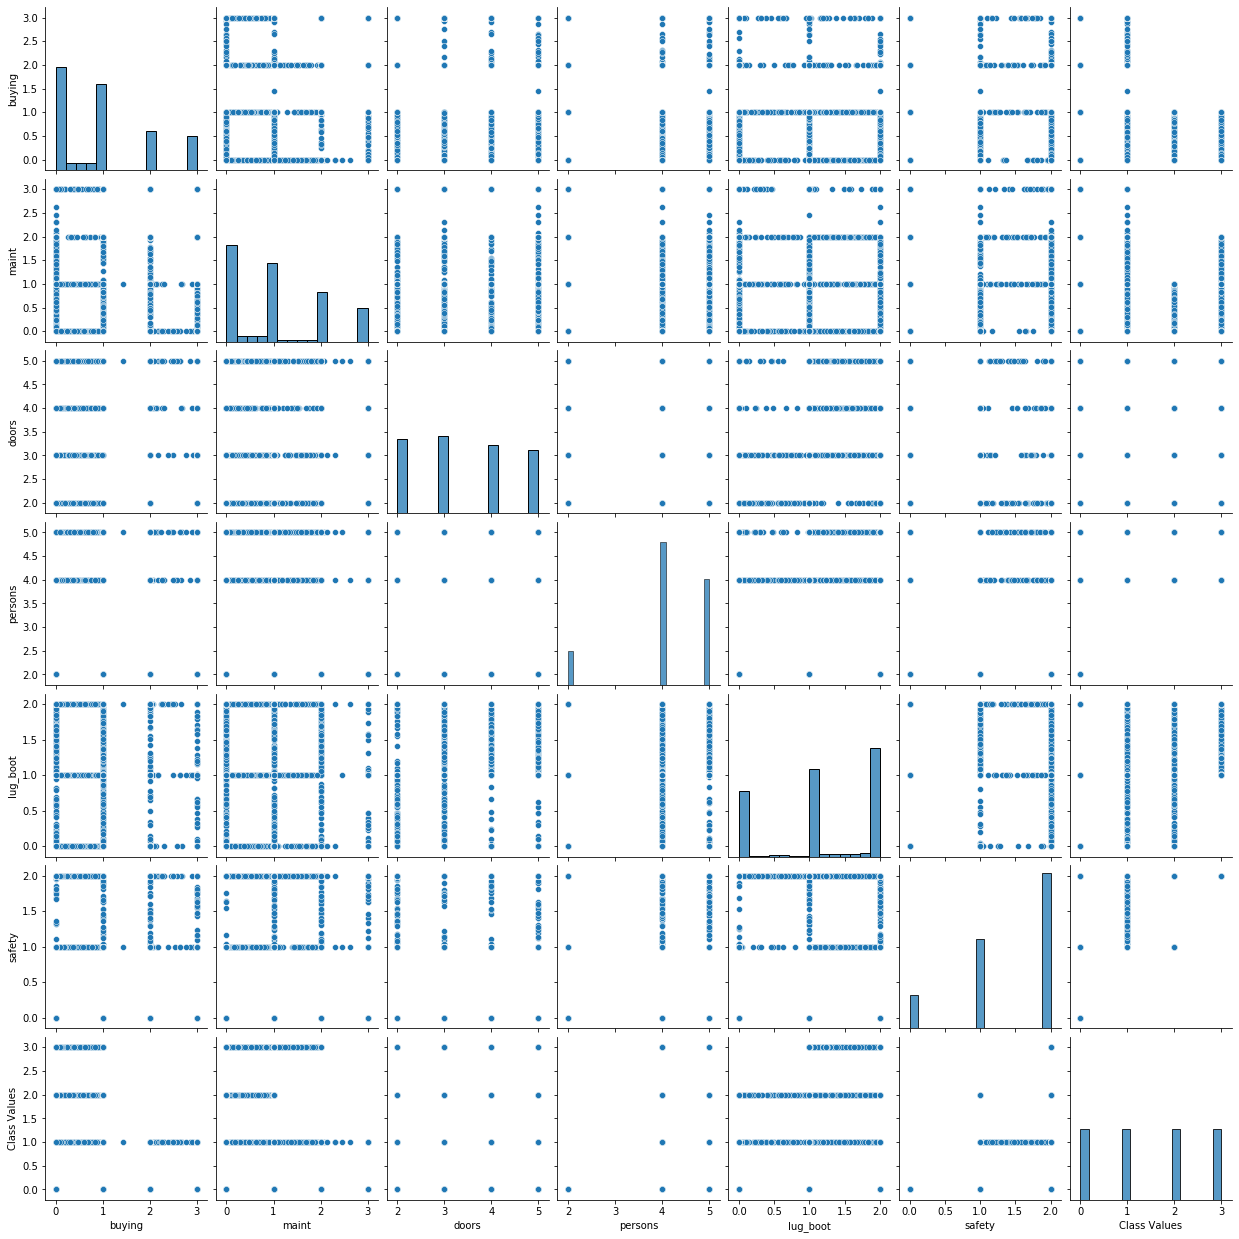

In [350]:
sns.pairplot(df1)

### 5.	Split dataset into train and test (70:30) (5 marks)
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [243]:
df=df1.copy()

In [246]:
X=df.drop("Class Values",axis=1)
Y=df["Class Values"]

In [274]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=42)

In [275]:
X_train.shape

(3385, 7)

In [358]:
#How would you ascertain this statistically?

#target variable was imbalanced at first , so we balanced it using SMOTE
df.describe()

#from 5 point summary the values are distributed properly



,buying,maint,doors,persons,lug_boot,safety,Class Values
count,4836.000000,4836.000000,4836.00000,4836.000000,4836.000000,4836.000000,4836.00000
mean,0.986194,1.058696,3.42804,4.136270,1.167553,1.437591,1.50000
std,0.998969,1.003425,1.10353,0.911741,0.780322,0.693492,1.11815
min,0.000000,0.000000,2.00000,2.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,2.00000,4.000000,0.693652,1.000000,0.75000
50%,1.000000,1.000000,3.00000,4.000000,1.000000,2.000000,1.50000
75%,2.000000,2.000000,4.00000,5.000000,2.000000,2.000000,2.25000
max,3.000000,3.000000,5.00000,5.000000,2.000000,2.000000,3.00000


<IPython.core.display.Javascript object>

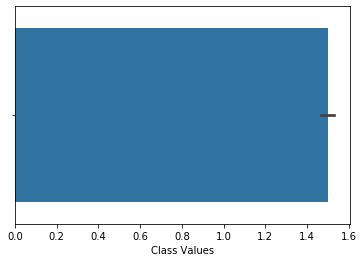

In [362]:
sns.barplot(x=df["Class Values"],hue=df["persons"])

### 6.	Fit a base model and explain the reason of selecting that model. Please write your key observations (15 marks) 

a.	What is the overall Accuracy? Please comment on whether it is good or not. 

b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

c.	Which variables are significant?

d.	What is Cohen’s Kappa Value and what inference do you make from the model
e.	Which other key model output parameters do you want to look at? 


In [357]:
#a. What is the overall Accuracy? Please comment on whether it is good or not.

In [334]:
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [335]:
y_pred= decision_tree.predict(X_test)

In [336]:
y_pred1= decision_tree.predict(X_train)

In [337]:
from sklearn.metrics import accuracy_score
# accuracy
print("Training accuracy",accuracy_score(y_pred,Y_test))
print("Test accuracy",accuracy_score(y_pred1,Y_train))


#No the model is overfitting because the dataset is small and decison tree is a complex model 

Training accuracy 0.994486560992419
Test accuracy 1.0


In [338]:
#b. What is Precision, Recall and F1 Score and 


from sklearn.metrics import classification_report

print("testing")
print(classification_report(y_pred,Y_test))
print("training")
print(classification_report(y_pred1,Y_train))

testing
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       0.98      0.99      0.99       367
           2       1.00      0.99      0.99       347
           3       1.00      1.00      1.00       367

    accuracy                           0.99      1451
   macro avg       0.99      0.99      0.99      1451
weighted avg       0.99      0.99      0.99      1451

training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       839
           1       1.00      1.00      1.00       838
           2       1.00      1.00      1.00       865
           3       1.00      1.00      1.00       843

    accuracy                           1.00      3385
   macro avg       1.00      1.00      1.00      3385
weighted avg       1.00      1.00      1.00      3385



In [ ]:
#what will be the optimization objective keeping in mind the problem statement

1. Pruning
2.Limiting depth
3. increasing min sample splt
4. feature selection

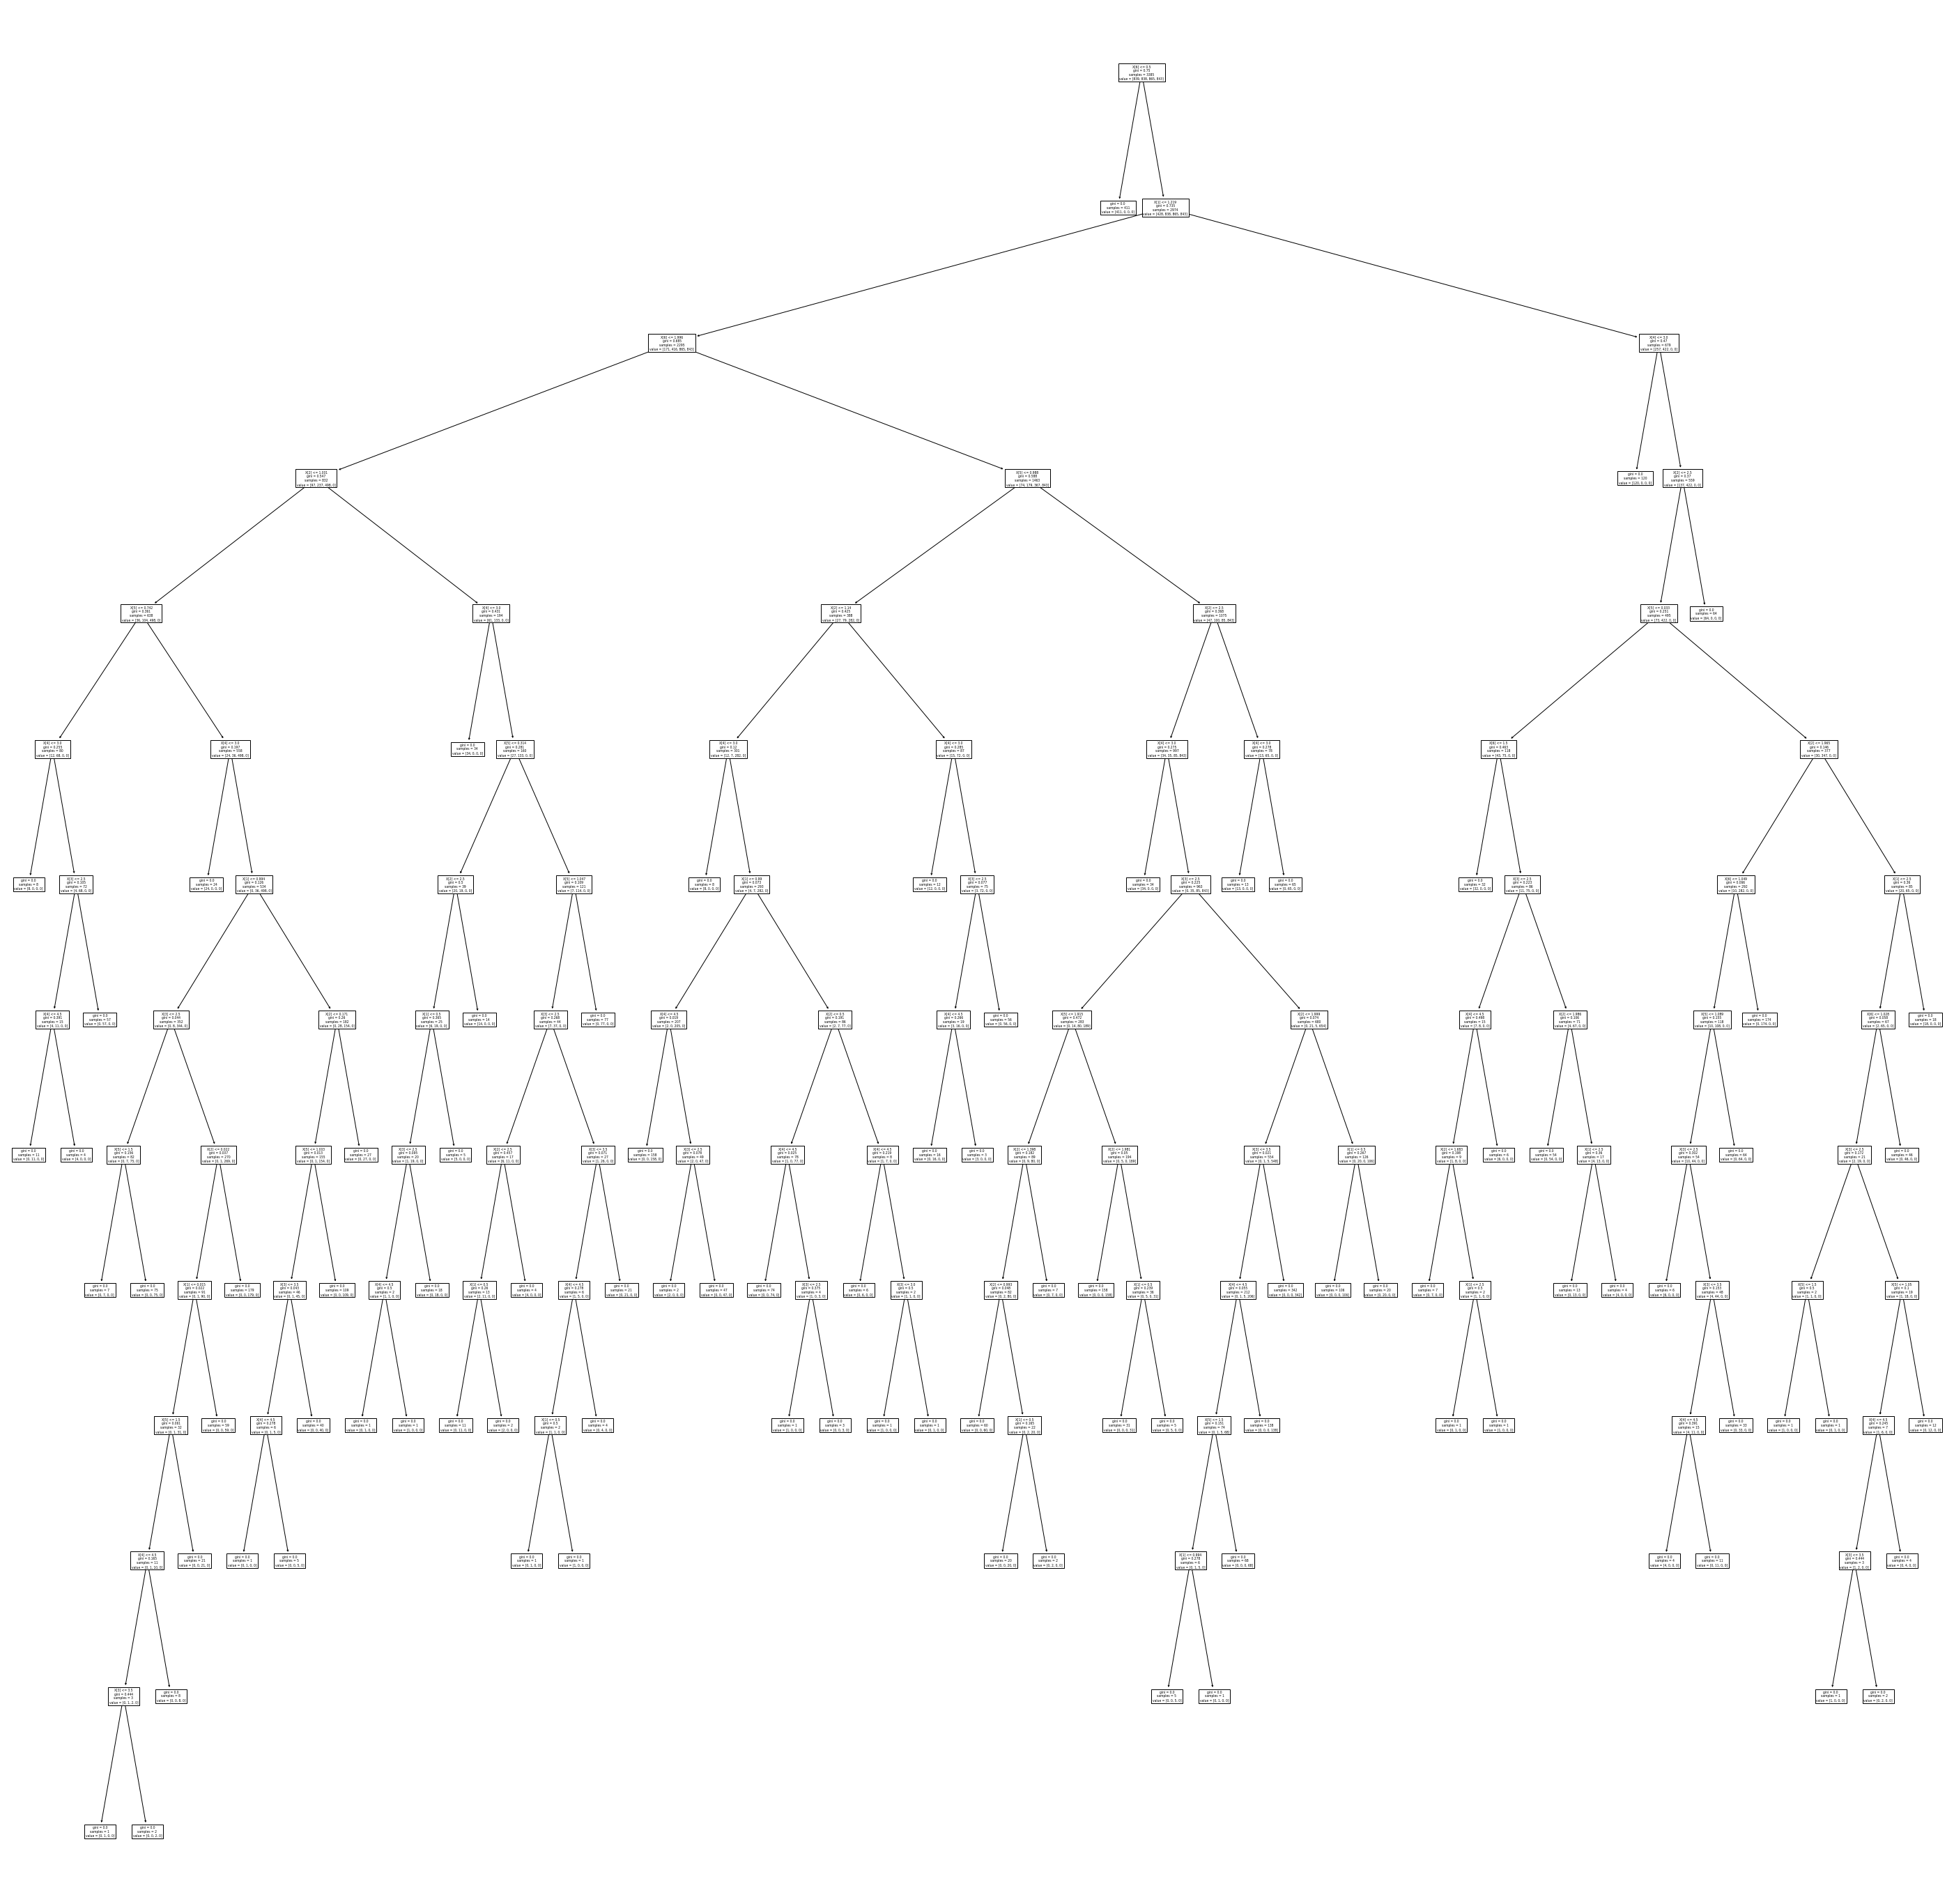

In [301]:
from sklearn import tree

fig,ax=plt.subplots(figsize=(50,50))
tree.plot_tree(decision_tree,ax=ax)
plt.show()

In [339]:
#c. Which variables are significant?
for i in range(len(df1.columns)):
    print(df1.columns[i]," ",decision_tree.feature_importances_[i])
    
    
# safety has the highest feature importance

buying   0.0
maint   0.15489848429696151
doors   0.20724259407762977
persons   0.02511449361340647
lug_boot   0.13773313104287646
safety   0.2204802445920409
Class Values   0.2545310523770849


In [341]:
#d. What is Cohen’s Kappa Value and what inference do you make from the model 

from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_pred,Y_test)


# substantial agreement


#e. Which other key model output parameters do you want to look at?

# doors paramter
# maintanence also

0.9926469004607723

### 7.	How do you improve overall efficiency of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [342]:
# 1 ) Pruning

decision_tree=DecisionTreeClassifier(ccp_alpha=0.025,random_state=42)
decision_tree.fit(X_train,Y_train)
y_pred= decision_tree.predict(X_test)
y_pred1= decision_tree.predict(X_train)
print("Training accuracy",accuracy_score(y_pred,Y_test))
print("Test accuracy",accuracy_score(y_pred1,Y_train))
print(classification_report(y_pred,Y_test))

Training accuracy 0.844934527911785
Test accuracy 0.8608567208271787
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       236
           1       0.85      0.75      0.80       421
           2       0.89      0.86      0.87       359
           3       1.00      0.84      0.91       435

    accuracy                           0.84      1451
   macro avg       0.85      0.86      0.84      1451
weighted avg       0.87      0.84      0.85      1451



In [ ]:
# this is good model neither its overfitting, nor its underfitting

In [303]:
# limiting tree depth
decision_tree=DecisionTreeClassifier(max_depth=5,random_state=42)
decision_tree.fit(X_train,Y_train)
y_pred= decision_tree.predict(X_test)
y_pred1= decision_tree.predict(X_train)
print("Training accuracy",accuracy_score(y_pred,Y_test))
print("Test accuracy",accuracy_score(y_pred1,Y_train))

Training accuracy 0.8766368022053757
Test accuracy 0.889807976366322


In [ ]:
# this is good model neither its overfitting, nor its underfitting

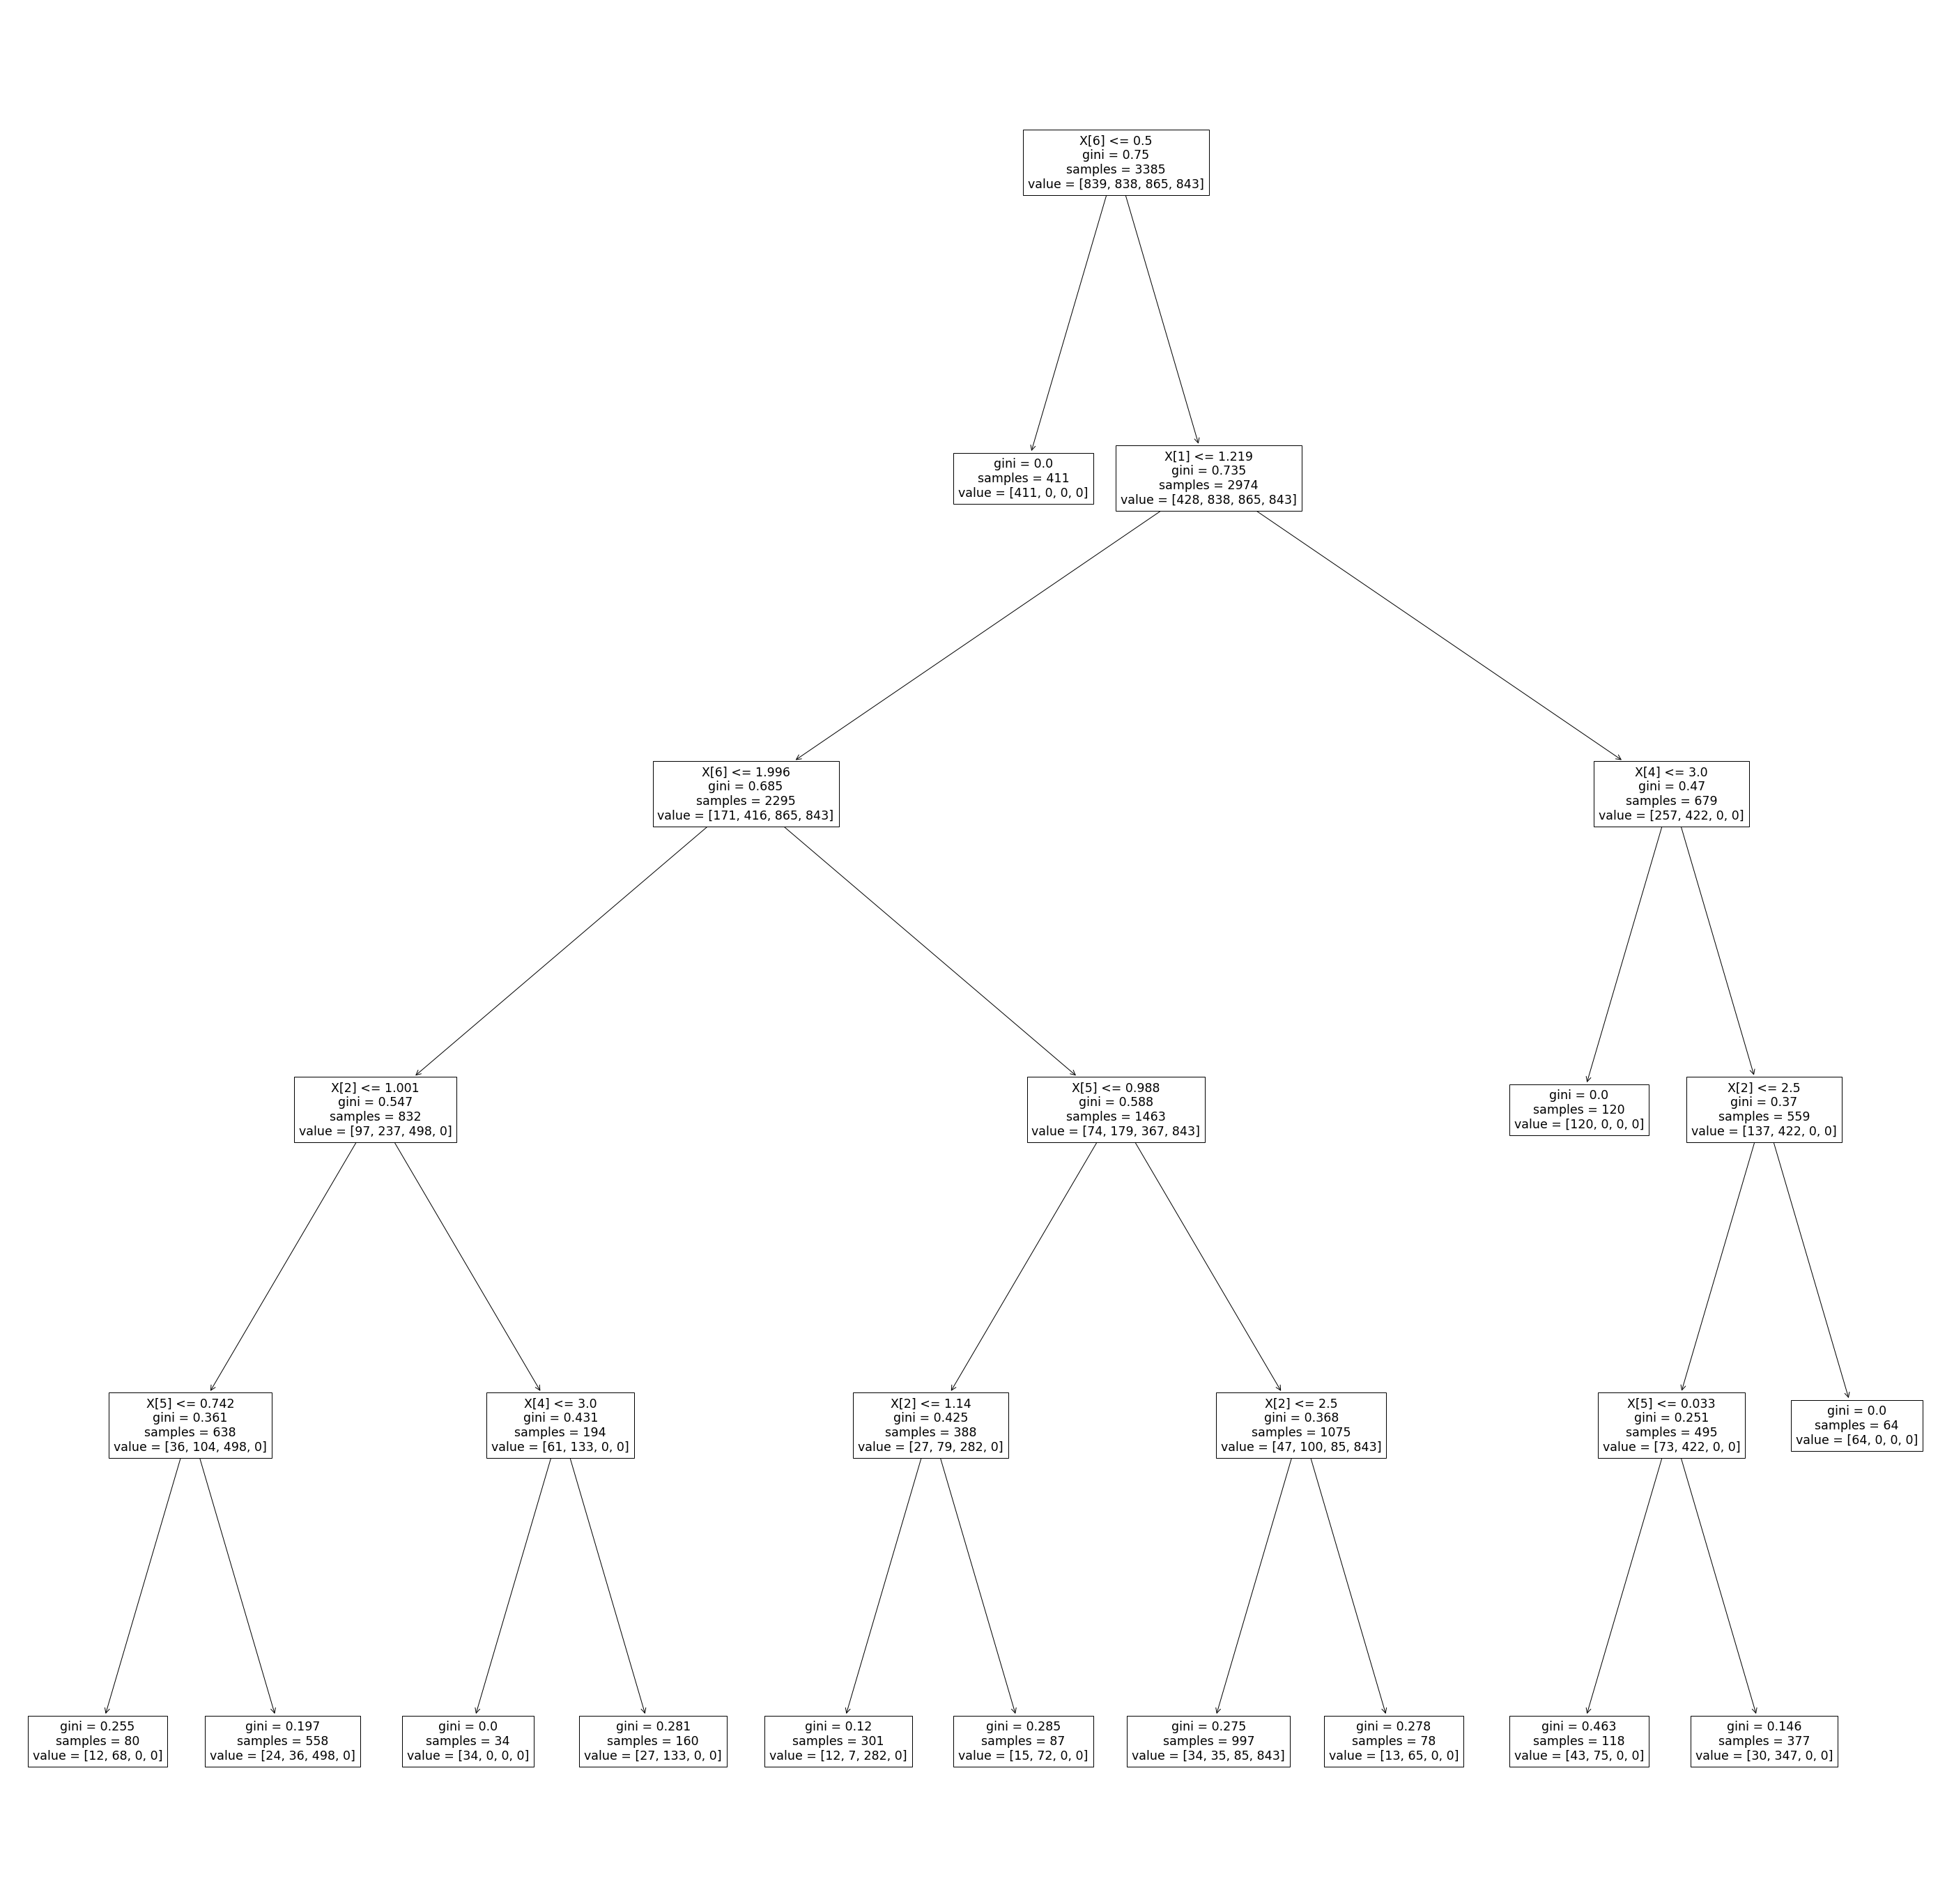

In [304]:
fig,ax=plt.subplots(figsize=(50,50))
tree.plot_tree(decision_tree,ax=ax)
plt.show()

In [316]:
# increasing minimum sample leaf

decision_tree=DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=2,random_state=42)
decision_tree.fit(X_train,Y_train)
y_pred= decision_tree.predict(X_test)
y_pred1= decision_tree.predict(X_train)
print("Training accuracy",accuracy_score(y_pred,Y_test))
print("Test accuracy",accuracy_score(y_pred1,Y_train))

Training accuracy 0.988973121984838
Test accuracy 0.9970457902511078


In [ ]:
# this is an overfitting model

### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

3.	What changes from the base model had the most effect on model performance?

4.	What are the key risks to your results and interpretation?


In [322]:
#8.1

# PRUNING and REDUCING DEPTH gave a good model 

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test,y_pred)
print(cm)


['unacc', 'acc', 'good', 'vgood']

# based on confusion matrix it is a good model for vgood cases and unacceptable cases  coz it classifies very less number in 
# majority of vgood condition cars are predicted correctly
# majority of the unacc classes are also predicted unacc so its a good model

# between classes acc and good are having little misclassification issue
# since these two are very close to hierarchy its an okay issue

[[236 104  16  14]
 [  0 317  36  18]
 [  0   0 307  37]
 [  0   0   0 366]]


In [331]:
len(df1.columns)

7

In [344]:
df2=df1.copy()

In [333]:
#8.2

#Buisness Interpretation

#The model can predict the card is vgood or unnacepatble with 83% accuracy

for i in range(len(df1.columns)):
    print(df1.columns[i]," ",decision_tree.feature_importances_[i])
    
    
# safety has the highest feature importance

buying   0.0
maint   0.1676446113465855
doors   0.19591236018904834
persons   0.0
lug_boot   0.06396892328356854
safety   0.22627769252216762
Class Values   0.34619641265863


<IPython.core.display.Javascript object>

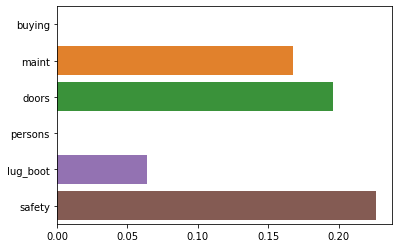

In [345]:
sns.barplot(x=decision_tree.feature_importances_[:-1],y=df1.columns[:-1])

In [ ]:
#What changes from the base model had the most effect on model performance?

buying inc
doors dec
persons dec by fraction of 0.2-0
lug_boot increased by 0.7


In [346]:
cm=confusion_matrix(Y_test,y_pred)
print(cm)


['unacc', 'acc', 'good', 'vgood']

[[236 104  16  14]
 [  0 317  36  18]
 [  0   0 307  37]
 [  0   0   0 366]]


['unacc', 'acc', 'good', 'vgood']

In [349]:
#What are the key risks to your results and interpretation?

236/30
#there is still chance that 7% can be predicted as good and vgood 
366/14
#there is 26% chance that good condition cars are predicted as unaccepatable


#the model is really good in predicing the risky cars 

26.142857142857142